In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


**Exploratory Data Analysis**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [5]:
np.random.seed(42)
df = pd.read_csv('data/risk_factors_cervical_cancer.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [6]:
print(df['STDs'].unique())

['0.0' '1.0' '?']


In [7]:
df = df.replace('?', np.NaN)
columns_to_drop = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [9]:
# # Convert columns to numeric (if applicable)
# df['STDs'] = pd.to_numeric(df['STDs'], errors='coerce')
# df['STDs: Time since first diagnosis'] = pd.to_numeric(df['STDs: Time since first diagnosis'], errors='coerce')
# df['STDs: Time since last diagnosis'] = pd.to_numeric(df['STDs: Time since last diagnosis'], errors='coerce')
# # Check if 'STD' is 0 and 'STDs: Time since first diagnosis' is NaN
# check_0 = (df['STDs'] == 0) & df['STDs: Time since first diagnosis'].isna()
# check0 = (df['STDs'] == 0) & df['STDs: Time since last diagnosis'].isna()
# # Use loc to set the values to 0 in the specified rows
# df.loc[check_0, 'STDs: Time since first diagnosis'] = 0
# df.loc[check0, 'STDs: Time since last diagnosis'] = 0
# # Verify the changes
# df

In [10]:
pd.set_option('display.max_rows',900)
print((df.dtypes))

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [11]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:') #number between 0 and 1
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing) 

data dimensions: (858, 34)
fraction of missing values in features:
Number of sexual partners             0.030303
First sexual intercourse              0.008159
Num of pregnancies                    0.065268
Smokes                                0.015152
Smokes (years)                        0.015152
Smokes (packs/year)                   0.015152
Hormonal Contraceptives               0.125874
Hormonal Contraceptives (years)       0.125874
IUD                                   0.136364
IUD (years)                           0.136364
STDs                                  0.122378
STDs (number)                         0.122378
STDs:condylomatosis                   0.122378
STDs:cervical condylomatosis          0.122378
STDs:vaginal condylomatosis           0.122378
STDs:vulvo-perineal condylomatosis    0.122378
STDs:syphilis                         0.122378
STDs:pelvic inflammatory disease      0.122378
STDs:genital herpes                   0.122378
STDs:molluscum contagiosum            0.

In [13]:
Biopsy = df.value_counts('Biopsy')
print(Biopsy.head())

Biopsy
0    803
1     55
Name: count, dtype: int64


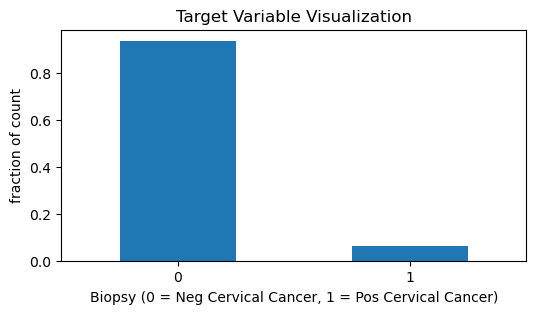

In [14]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
plt.figure(figsize=(6,3))
pd.value_counts(df['Biopsy'], normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.ylabel('fraction of count')
plt.xlabel('Biopsy (0 = Neg Cervical Cancer, 1 = Pos Cervical Cancer)')
plt.title('Target Variable Visualization')
plt.savefig("Targt variable visualization", dpi=300, bbox_inches="tight")
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split 

# let's separate the feature matrix X, and target variable y
y = df['Biopsy'] #Biopsy is our target variable
X = df.loc[:, df.columns != 'Biopsy'] # all other columns are features

In [16]:
cat_ftrs = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller']
num_ftrs = ['Age','Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'IUD (years)', 'Hormonal Contraceptives (years)', 'STDs (number)', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'  ]

In [17]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:') #number between 0 and 1
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(X.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing) 

data dimensions: (858, 34)
fraction of missing values in features:
Number of sexual partners             0.030303
First sexual intercourse              0.008159
Num of pregnancies                    0.065268
Smokes                                0.015152
Smokes (years)                        0.015152
Smokes (packs/year)                   0.015152
Hormonal Contraceptives               0.125874
Hormonal Contraceptives (years)       0.125874
IUD                                   0.136364
IUD (years)                           0.136364
STDs                                  0.122378
STDs (number)                         0.122378
STDs:condylomatosis                   0.122378
STDs:cervical condylomatosis          0.122378
STDs:vaginal condylomatosis           0.122378
STDs:vulvo-perineal condylomatosis    0.122378
STDs:syphilis                         0.122378
STDs:pelvic inflammatory disease      0.122378
STDs:genital herpes                   0.122378
STDs:molluscum contagiosum            0.

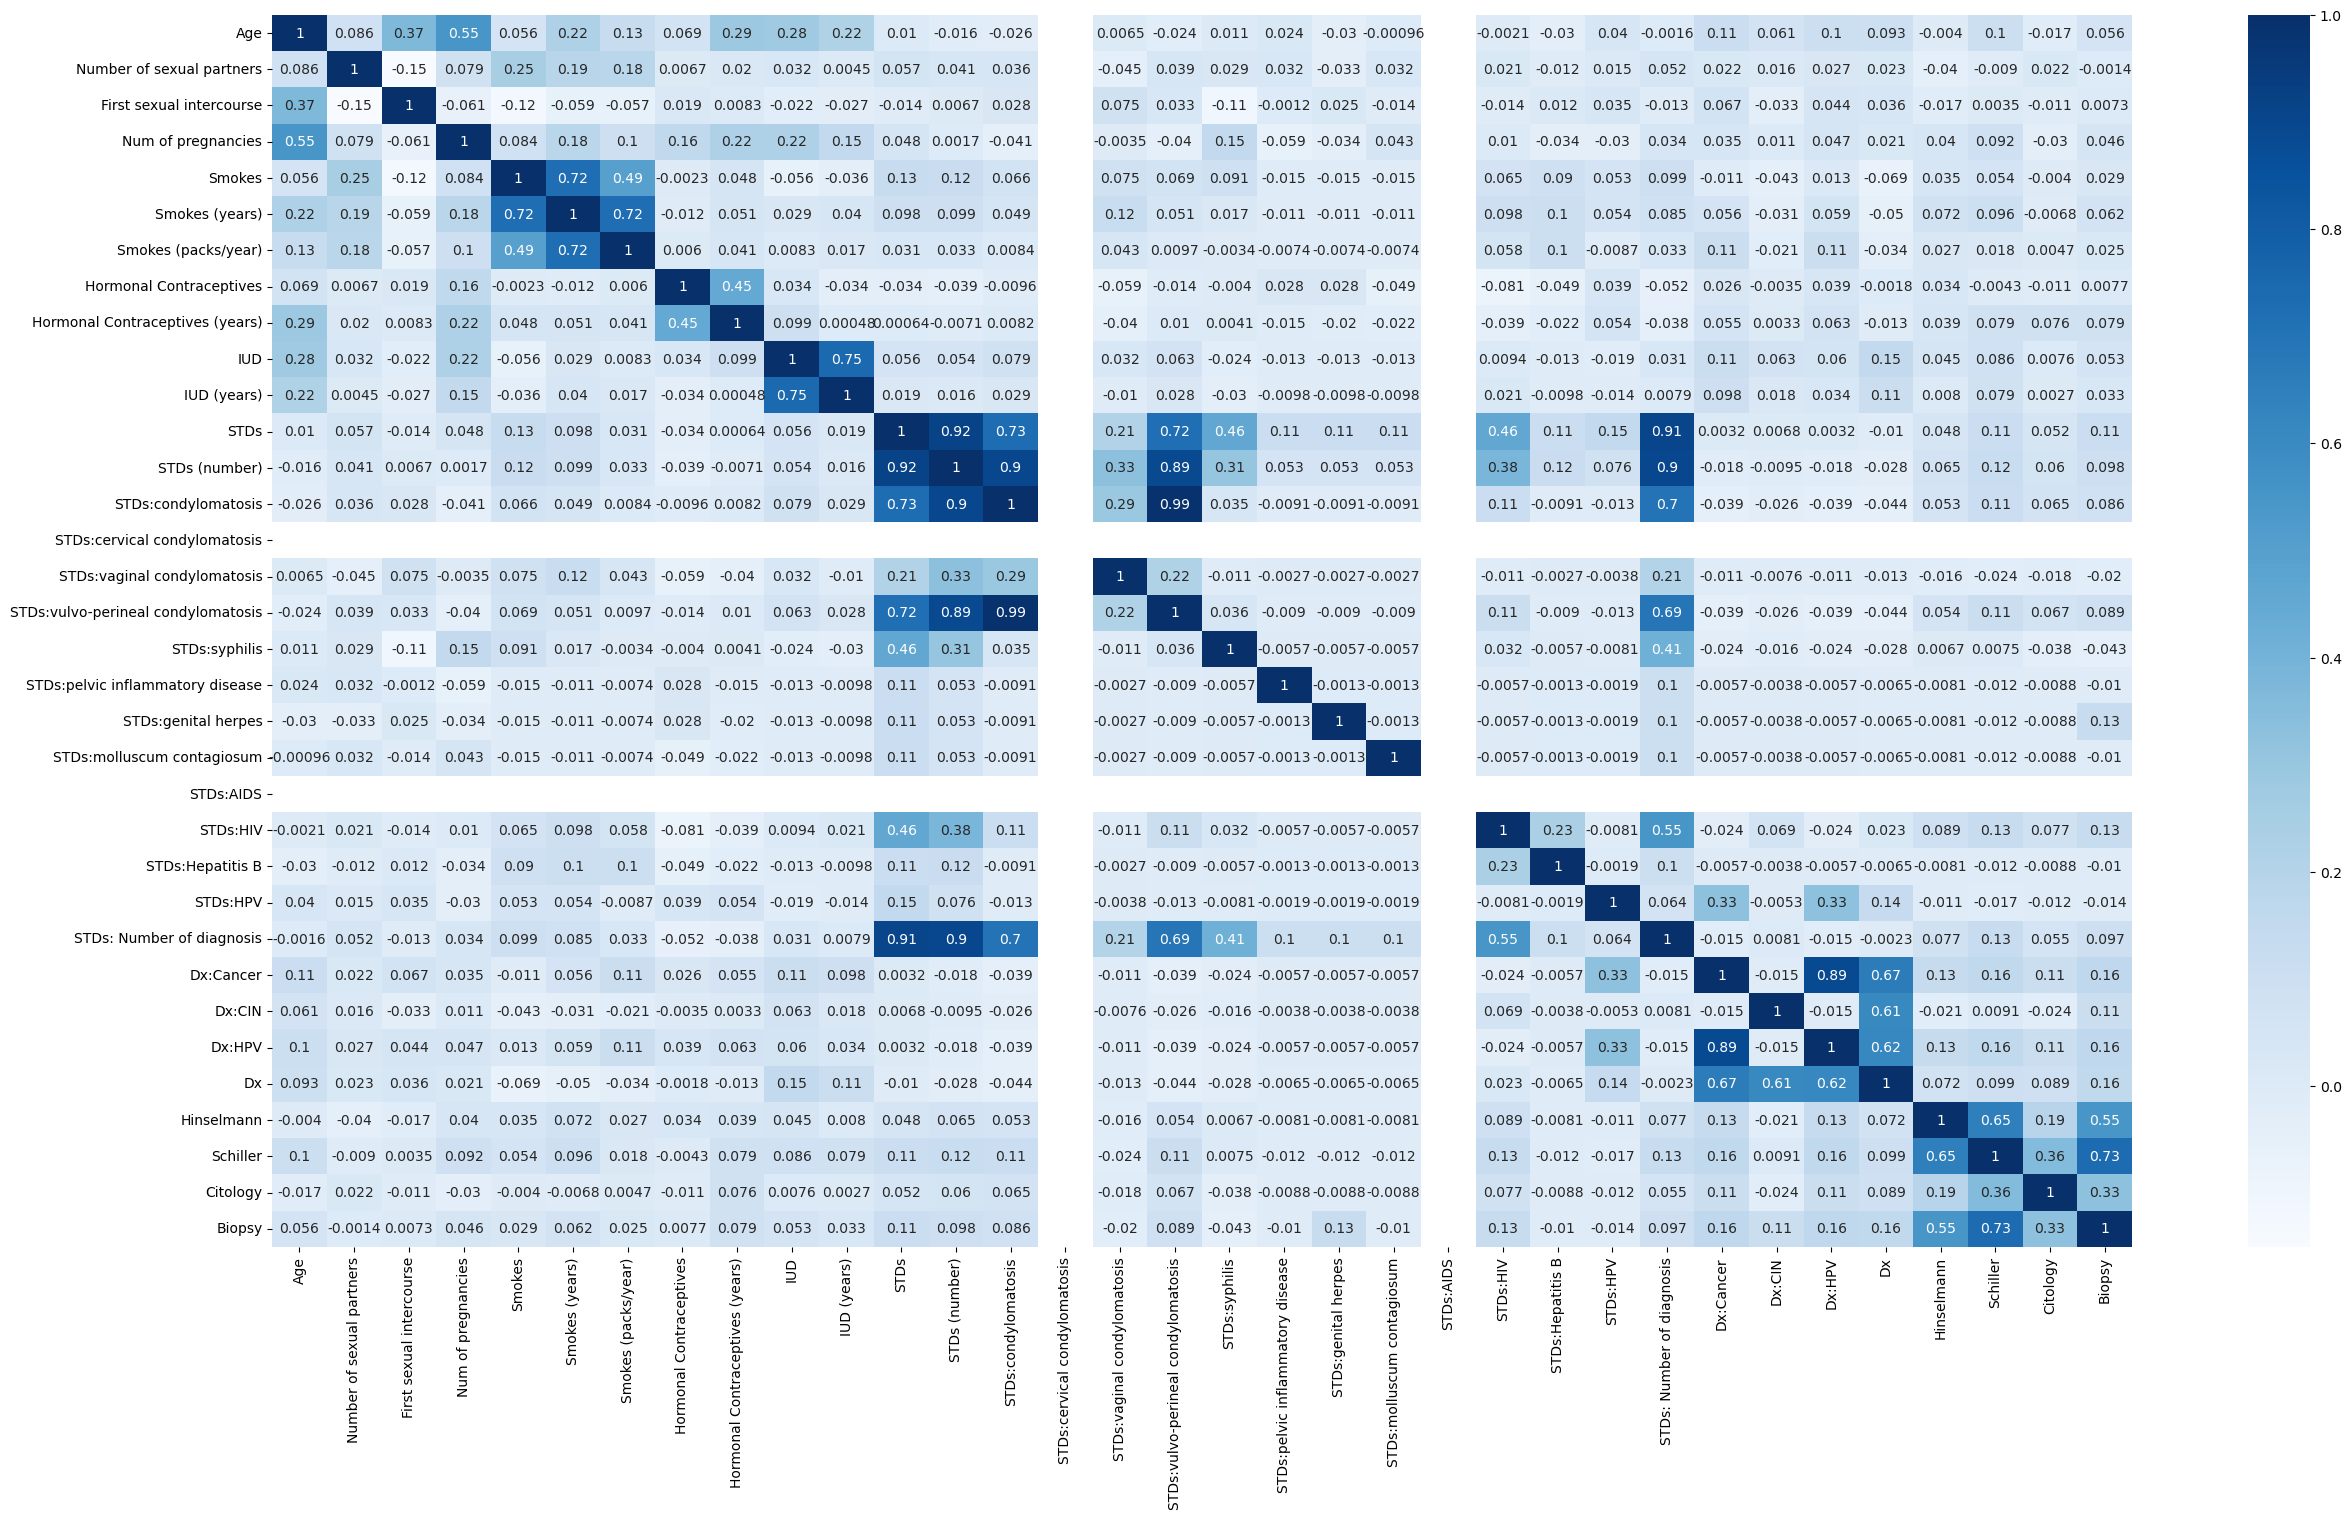

In [18]:
import seaborn as sns
plt.figure(figsize=(30,16))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.savefig("Dataset heatmap", dpi=300)
plt.show()

In [19]:
count_matrix = df.groupby(['Biopsy', 'Schiller']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)

Schiller    0   1
Biopsy           
0         777  26
1           7  48


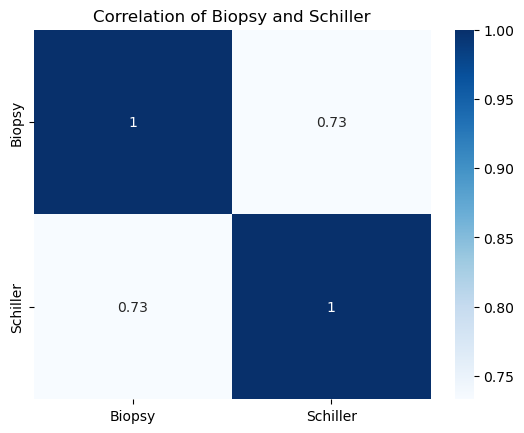

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

cor = df[['Biopsy', 'Schiller']].corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

plt.title('Correlation of Biopsy and Schiller')
plt.savefig("Heatmap of Biopsy and Schiller", dpi=300)
# Show the plot
plt.show()

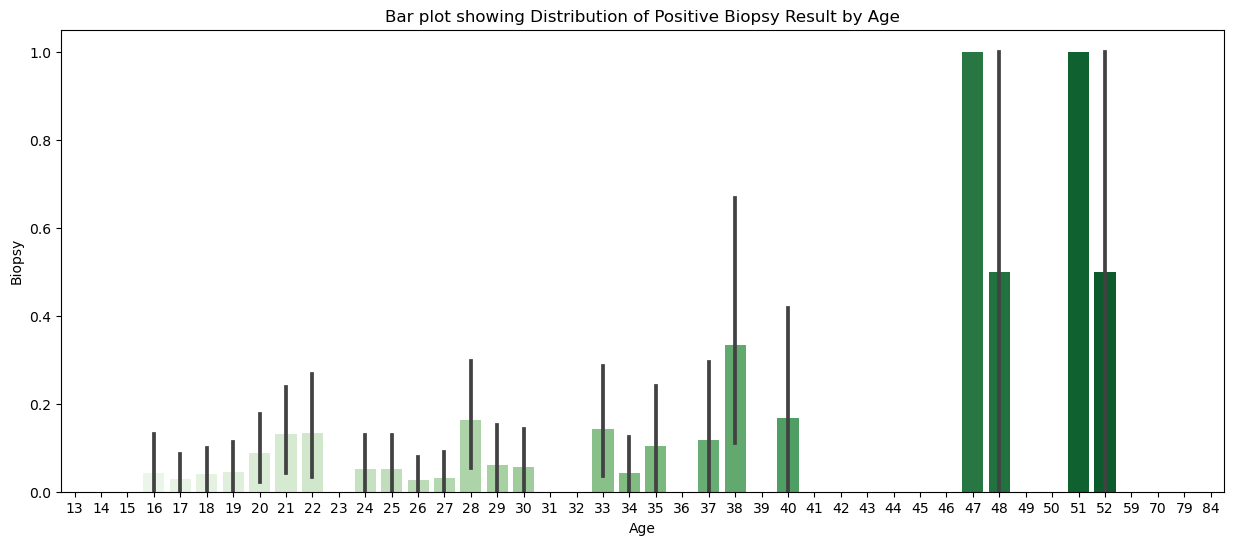

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.barplot(x = 'Age',
            y = 'Biopsy',
            data = df,
            palette = "Greens")
plt.title('Bar plot showing Distribution of Positive Biopsy Result by Age')
plt.savefig("Bar plot showing Distribution of Positive Biopsy Result by Age", dpi=300) # save as png
plt.show()

In [22]:
#calculate recall baseline
true_pos = 55
false_neg = 803

recall_bas = true_pos/(true_pos + false_neg)
print('Baseline Recall Score:', recall_bas)

Baseline Recall Score: 0.0641025641025641


**Models**

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
# let's separate the feature matrix X, and target variable y
y = df['Biopsy'] #Biopsy is our target variable
X = df.loc[:, df.columns != 'Biopsy'] # all other columns are features
#do reduced features model for data

# np.random.seed(42)
def MLpipe_KFold_(X, y, preprocessor, ML_algo, param_grid):
    test_scores = []
    best_models = []
    train_scores = []
    val_scores = []
    for i in range(10):
        random_state = np.random.randint(100)
        X_other, X_test, y_other, y_test = train_test_split(X,y,\
                    train_size = 0.8,random_state = random_state)
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
        for train_index, val_index in kf.split(X_other,y_other):
            X_train = X_other.iloc[train_index]
            y_train = y_other.iloc[train_index]
            X_val = X_other.iloc[val_index]
            y_val = y_other.iloc[val_index]
        X_prep = preprocessor.fit_transform(X_train)
        # the feature names after fit
        feature_names = preprocessor.get_feature_names_out()

        # you can convert the numpy array back to a data frame with the feature names if you want
        df_train = pd.DataFrame(data=X_prep,columns=feature_names)
      
        
        # transform the validation se
        df_CV = preprocessor.transform(X_val)
        df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
        
        # transform the test
        df_test = preprocessor.transform(X_test)
        df_test = pd.DataFrame(data=df_test,columns = feature_names)
        imputer = IterativeImputer(max_iter = 1000)
        X_impute = imputer.fit_transform(df_train)
        df_train_imp = pd.DataFrame(data=X_impute, columns = df_train.columns)
        df_val_imp = pd.DataFrame(data=imputer.transform(df_CV), columns = df_train.columns)
        df_test_imp = pd.DataFrame(data=imputer.transform(df_test), columns = df_train.columns)
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(ML_algo, param_grid=param_grid,scoring = 'recall',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        # this line actually fits the model on other
        grid.fit(df_train_imp, y_train)
        # save results into a data frame. feel free to print it and inspect it
        results = pd.DataFrame(grid.cv_results_)
        #print(results)
        #print('best model parameters:',grid.best_estimator_)
        #print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
        # save the model
        best=grid.best_estimator_
        best_models.append(best)
        # calculate and save the test score
        y_test_pred = best_models[-1].predict(df_test_imp)
        y_train_pred = best_models[-1].predict(df_train_imp)
        y_val_pred =  best_models[-1].predict(df_val_imp)
      
        recall= recall_score(y_test, y_test_pred)
        test_scores.append(recall)
        recall_train = recall_score(y_train, y_train_pred)
        train_scores.append(recall_train)
        recall_val = recall_score(y_val, y_val_pred)
        val_scores.append(recall_val)
        print('test score:',test_scores)
        print('best model', best)
    return test_scores, best_models, y_test, y_test_pred, df_test_imp, grid
    #look at evaluation metric problem set: look at the end; baseline f scores

**Logistic Regression (L2 Regularization) Model**

In [25]:
#L2 regularization
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
import statistics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
alpha = np.logspace(-2,2, num = 21)
ML_algo_1 = LogisticRegression(penalty='l2',max_iter=1000)
cat_ftrs = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller']
num_ftrs = ['Age','Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'IUD (years)', 'Hormonal Contraceptives (years)', 'STDs (number)', 'STDs']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])
param_grid_base = {}
param_grid = {'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2,1e3]}
L2_test_scores, L2_best_models, L2_y_test, L2_y_test_pred, L2_df_test, L2grid= MLpipe_KFold_(X,y,preprocessor,ML_algo_1,param_grid)
base_L2_test_scores, base_L2_best_models, base_L2_y_test, base_L2_y_test_pred, df_test_base, L2basegrid= MLpipe_KFold_(X,y,preprocessor,ML_algo_1,param_grid_base)
#change names to plot all together

Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.8]
best model LogisticRegression(max_iter=1000)
Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.8, 0.4166666666666667]
best model LogisticRegression(C=10.0, max_iter=1000)
Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.8, 0.4166666666666667, 0.4]
best model LogisticRegression(max_iter=1000)
Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.8, 0.4166666666666667, 0.4, 0.6]
best model LogisticRegression(C=1000.0, max_iter=1000)
Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.8, 0.4166666666666667, 0.4, 0.6, 0.5714285714285714]
best model LogisticRegression(max_iter=1000)
Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.8, 0.4166666666666667, 0.4, 0.6, 0.5714285714285714, 0.75]
best model LogisticRegression(max_iter=1000)
Fitting 4 folds for each of 8 candidates, totalling 32 fits
tes

In [98]:
print('L2 test recall:',np.around(np.mean(L2_test_scores),4),'+/-',np.around(np.std(L2_test_scores),2))
print('L2 baseline test recall:',np.around(np.mean(base_L2_test_scores),4),'+/-',np.around(np.std(base_L2_test_scores),2))

L2 test recall: 0.5746 +/- 0.13
L2 baseline test recall: 0.5674 +/- 0.16


**Logistic Regression (L1 Regularization) Model**

In [35]:
#L1 regularization
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
import statistics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

L1 = LogisticRegression(penalty='l1',solver='saga', max_iter=10000)

param_grid = {'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2,1e3]}
param_grid_base = {}
L1_test_scores, L1_best_models, L1_y_test, L1_y_test_pred, L1_df_test, L1grid= MLpipe_KFold_(X,y,preprocessor,L1,param_grid)
base_L1_test_scores, base_L1_best_models, base_L1_y_test, base_L1_y_test_pred, df_test_base, L1basegrid= MLpipe_KFold_(X,y,preprocessor,L1,param_grid_base)
#change names to plot all together

Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.45454545454545453]
best model LogisticRegression(max_iter=10000, penalty='l1', solver='saga')
Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.45454545454545453, 0.4]
best model LogisticRegression(max_iter=10000, penalty='l1', solver='saga')
Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.45454545454545453, 0.4, 0.6923076923076923]
best model LogisticRegression(max_iter=10000, penalty='l1', solver='saga')
Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.45454545454545453, 0.4, 0.6923076923076923, 0.6666666666666666]
best model LogisticRegression(max_iter=10000, penalty='l1', solver='saga')
Fitting 4 folds for each of 8 candidates, totalling 32 fits
test score: [0.45454545454545453, 0.4, 0.6923076923076923, 0.6666666666666666, 0.625]
best model LogisticRegression(max_iter=10000, penalty='l1', solver='saga')
Fitting 4 folds for each of 

In [36]:
print('L1 test recall:',np.around(np.mean(L1_test_scores),4),'+/-',np.around(np.std(L1_test_scores),2))
print('L1 baseline test recall:',np.around(np.mean(base_L1_test_scores),4),'+/-',np.around(np.std(base_L1_test_scores),2))

L1 test recall: 0.6785 +/- 0.17
L1 baseline test recall: 0.6435 +/- 0.14


**Random Forest Classifier Model**

In [66]:
ML_algo_2 = RandomForestClassifier() 

# set RF parameter grid
param_grid = {
    'n_estimators': [ 3, 10,],
    'max_depth': [ 4, 5, 6, 7, 8, 9, 10]
}
param_grid_base= {}
RF_test_scores, RF_best_models, RF_y_test, RF_y_test_pred, RF_df_test, RFgrid = MLpipe_KFold_(X,y,preprocessor,ML_algo_2,param_grid)
base_RF_test_scores, base_RF_best_models, base_RF_y_test, base_RF_y_test_pred, df_test_base, RFgridbase = MLpipe_KFold_(X,y,preprocessor,ML_algo_2,param_grid_base)

Fitting 4 folds for each of 14 candidates, totalling 56 fits
test score: [0.46153846153846156]
best model RandomForestClassifier(max_depth=6, n_estimators=3)
Fitting 4 folds for each of 14 candidates, totalling 56 fits
test score: [0.46153846153846156, 0.8]
best model RandomForestClassifier(max_depth=5, n_estimators=3)
Fitting 4 folds for each of 14 candidates, totalling 56 fits
test score: [0.46153846153846156, 0.8, 0.45454545454545453]
best model RandomForestClassifier(max_depth=8, n_estimators=3)
Fitting 4 folds for each of 14 candidates, totalling 56 fits
test score: [0.46153846153846156, 0.8, 0.45454545454545453, 0.6666666666666666]
best model RandomForestClassifier(max_depth=6, n_estimators=10)
Fitting 4 folds for each of 14 candidates, totalling 56 fits
test score: [0.46153846153846156, 0.8, 0.45454545454545453, 0.6666666666666666, 0.7272727272727273]
best model RandomForestClassifier(max_depth=6, n_estimators=3)
Fitting 4 folds for each of 14 candidates, totalling 56 fits
test 

In [67]:
print('RF test recall:',np.around(np.mean(RF_test_scores),4),'+/-',np.around(np.std(RF_test_scores),2))
print('RF baseline test recall:',np.around(np.mean(base_RF_test_scores),4),'+/-',np.around(np.std(base_RF_test_scores),2))

RF test recall: 0.5405 +/- 0.21
RF baseline test recall: 0.5757 +/- 0.19


**SVC Model**

In [111]:
import numpy as np
from sklearn.svm import SVC
ML_algo_3= SVC(gamma = 1, C = 1)
param_grid = {
    'gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'C': [1e-1, 1e0, 1e1]
}
param_grid_base = {}
SVC_test_scores, SVC_best_models, SVC_y_test, SVC_y_test_pred, SVC_df_test, SVCgrid = MLpipe_KFold_(X,y,preprocessor,ML_algo_3,param_grid)
base_SVC_test_scores, base_SVC_best_models, base_SVC_y_test, base_SVC_y_test_pred, df_test_base, SVCgrdibase = MLpipe_KFold_(X,y,preprocessor,ML_algo_3,param_grid_base)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
test score: [0.4375]
best model SVC(C=10.0, gamma=0.1)
Fitting 4 folds for each of 15 candidates, totalling 60 fits
test score: [0.4375, 0.42857142857142855]
best model SVC(C=10.0, gamma=0.1)
Fitting 4 folds for each of 15 candidates, totalling 60 fits
test score: [0.4375, 0.42857142857142855, 0.36363636363636365]
best model SVC(C=10.0, gamma=0.1)
Fitting 4 folds for each of 15 candidates, totalling 60 fits
test score: [0.4375, 0.42857142857142855, 0.36363636363636365, 0.4444444444444444]
best model SVC(C=10.0, gamma=0.1)
Fitting 4 folds for each of 15 candidates, totalling 60 fits
test score: [0.4375, 0.42857142857142855, 0.36363636363636365, 0.4444444444444444, 0.36363636363636365]
best model SVC(C=10.0, gamma=0.1)
Fitting 4 folds for each of 15 candidates, totalling 60 fits
test score: [0.4375, 0.42857142857142855, 0.36363636363636365, 0.4444444444444444, 0.36363636363636365, 0.4166666666666667]
best model SVC(C=10.0, gamm

In [112]:
print('SVC test recall',np.around(np.mean(SVC_test_scores),4),'+/-',np.around(np.std(SVC_test_scores),2))
print('SVC baseline test recall:',np.around(np.mean(base_SVC_test_scores),4),'+/-',np.around(np.std(base_SVC_test_scores),2))

SVC test recall 0.4382 +/- 0.1
SVC baseline test recall: 0.0091 +/- 0.03


**Results**

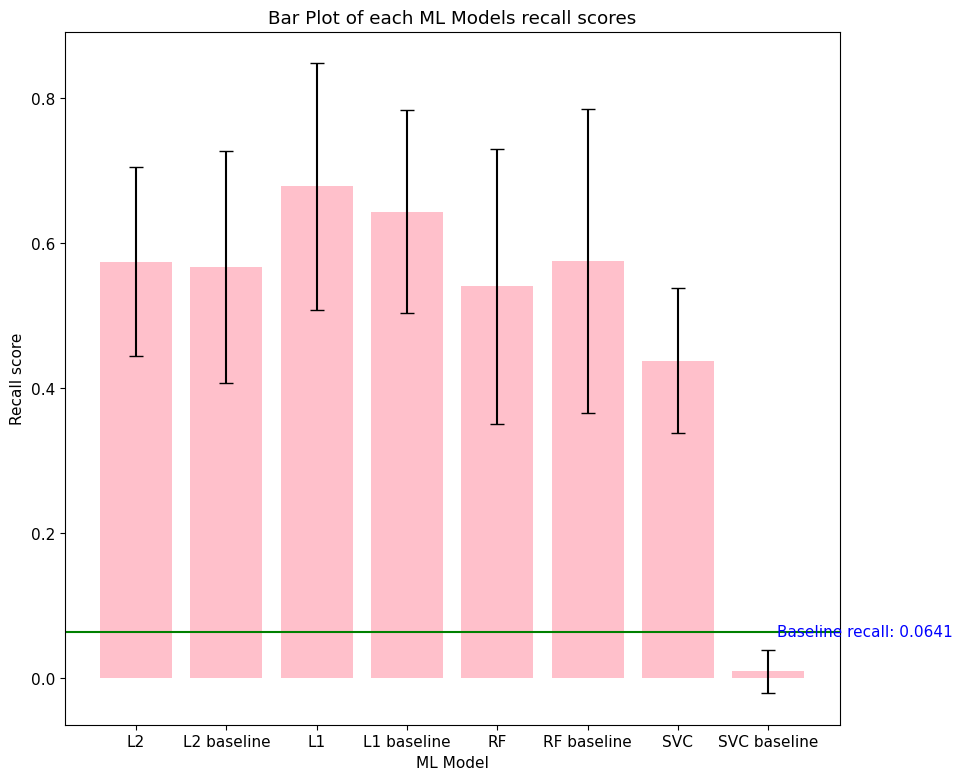

In [48]:
import matplotlib.pyplot as plt
models = ['L2', 'L2 baseline', 'L1', 'L1 baseline', 'RF', 'RF baseline', 'SVC', 'SVC baseline']
mean_recall = [0.5746, 0.5674, 0.6785, 0.6435, 0.5405, 0.5757, 0.4382, 0.0091]  
mean_std = [0.13, 0.16, 0.17, 0.14, 0.19, 0.21, 0.1, 0.03]
plt.figure(figsize=(10, 9))
plt.bar(models, mean_recall, yerr=mean_std, capsize=5, color = 'pink')
plt.axhline(y=recall_bas, color='green',linestyle='-', label='Baseline recall')
plt.text(len(models) - 0.9, recall_bas, f'Baseline recall: {recall_bas:.4f}', va='center', ha='left', color='blue')
plt.xlabel('ML Model')
plt.ylabel('Recall score')
plt.title('Bar Plot of each ML Models recall scores')
plt.savefig("ML Model recall scores bar plot", dpi=300) # save as png
plt.show()

**Model Confusion Matrixes**

In [153]:
from sklearn.metrics import confusion_matrix

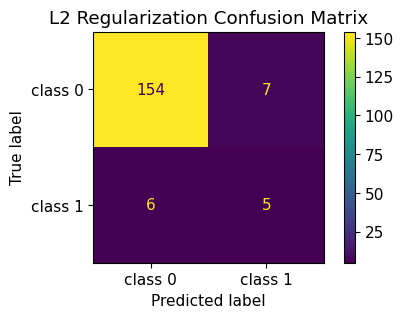

In [131]:
#L2 Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(L2_y_test,L2_y_test_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
#plt.tight_layout()
plt.title('L2 Regularization Confusion Matrix')
plt.savefig("L2 Confusion matrix", dpi=300, bbox_inches="tight") # save as png
plt.show()

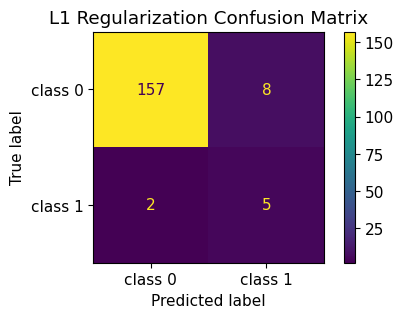

In [132]:
#L1 Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(L1_y_test,L1_y_test_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
#plt.tight_layout()
plt.title('L1 Regularization Confusion Matrix')
plt.savefig("L1 Confusion Matrix", dpi=300, bbox_inches="tight") # save as png
plt.show()

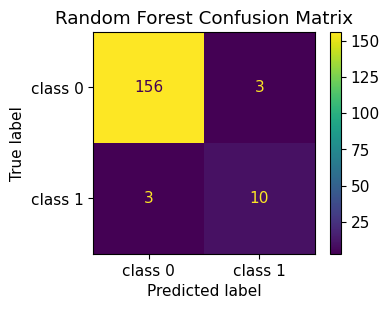

In [133]:
#RF Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(RF_y_test,RF_y_test_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(4,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.title('Random Forest Confusion Matrix')
plt.savefig("RF Confusion Matrix", dpi=300, bbox_inches="tight") # save as png
plt.show()

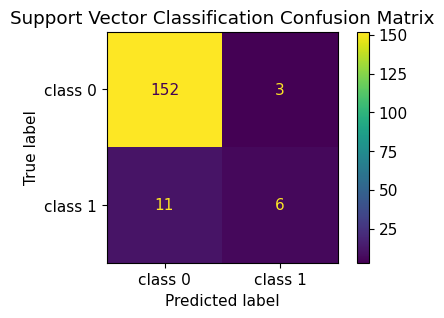

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(SVC_y_test,SVC_y_test_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
#plt.tight_layout()
plt.title('Support Vector Classification Confusion Matrix')
plt.savefig("SVC Confusion Matrix", dpi=300, bbox_inches="tight") # save as png
plt.show()

**Global Feature Importance**

In [170]:
ftr_names= L2_df_test.columns

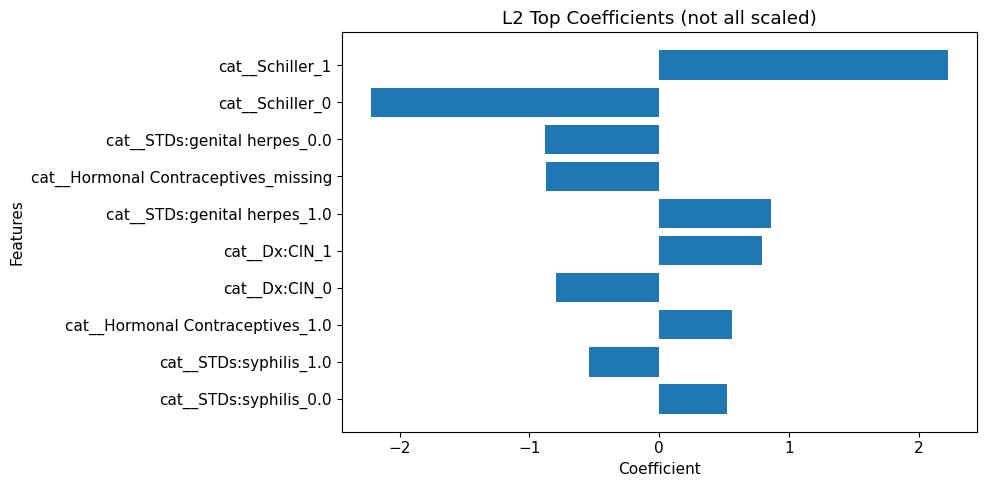

In [171]:
coefs = L2grid.best_estimator_.coef_[0]
sorted_indices = np.argsort(np.abs(coefs))

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 11})
plt.barh(np.arange(10), coefs[sorted_indices[-10:]])
plt.yticks(np.arange(10), ftr_names[sorted_indices[-10:]])
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('L2 Top Coefficients (not all scaled)')
plt.tight_layout()
plt.savefig('L2 permutation features', dpi=300)
plt.show()

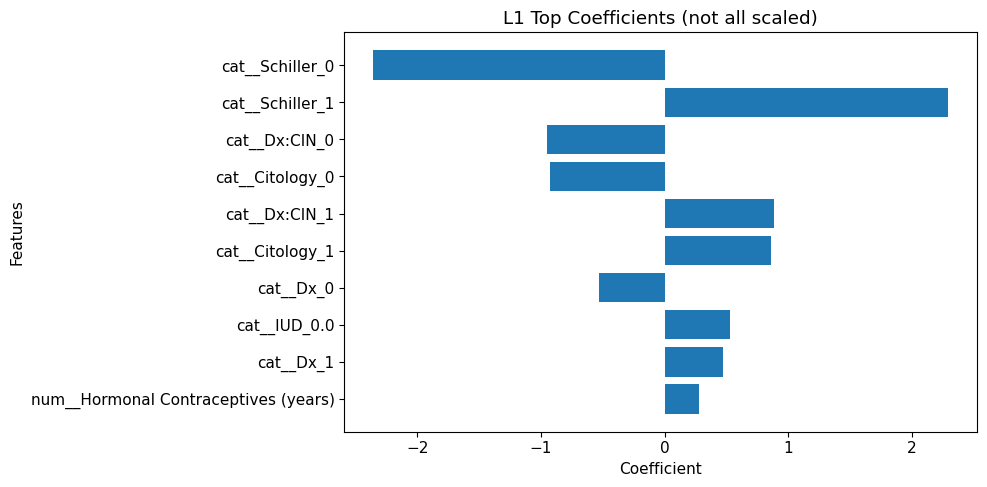

In [38]:
ftr_names= L1_df_test.columns
coefs = L1grid.best_estimator_.coef_[0]
sorted_indices = np.argsort(np.abs(coefs))

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 11})
plt.barh(np.arange(10), coefs[sorted_indices[-10:]])
plt.yticks(np.arange(10), ftr_names[sorted_indices[-10:]])
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('L1 Top Coefficients (not all scaled)')
plt.tight_layout()
plt.savefig('L1 permutation features', dpi=300)
plt.show()